<div align="right">
<table style="width:50%">
  <tr>
    <th>Hazırlayan</th>
    <th>Versiyon</th> 
    <th>Tarih</th> 
    <th>Dil</th>
  </tr>
  <tr>
    <td>dataFLOYD</td>
    <td>v1.00</td> 
    <td>16 Eyl 2018</td>
    <td>TR </td>
  </tr>
</table>
</div>

<div class="alert alert-danger">
<br>
Başlamadan önce henüz bakmadıysanız aşağıdaki yazıları gözden geçirmenizi öneririm. <br>
<br>
ÖN KOŞULLAR
    <br><a href="https://www.datafloyd.com/tr/veri-bilimi-icin-temel-python-kullanimi/">Temel Python kullanımı</a>
    <br><a href="https://www.datafloyd.com/tr/pyhton-numpy-kutuphanesinin-kullanimi/">Numpy kütüphanesi kullanımı</a>
    <br><a href="https://www.datafloyd.com/tr/pyhton-matplotlib-kutuphanesini-kullanarak-veri-gorsellestirme-temel-grafikler%C2%B6/">Python “matplotlib” kütüphanesini kullanarak temel görselleştirme</a>
    <br><a href="https://www.datafloyd.com/tr/confusion-matrix-hakkinda/">"Confusion matrix" hakkında</a>
    <br><a href="https://www.datafloyd.com/tr/yapay-sinir-aglari-neural-networks-1-bolum-tek-bir-noron-hakkinda/">Yapay sinir ağları Bölüm-1</a>
</div>

# YAPAY SİNİR AĞLARI (NEURAL NETWORKS) 2. BÖLÜM
MİMARİLER VE "BACK PROPAGATION"

<div class="well">
"Fight Club" ile başladık onunla devam etsin madem diye başlığa filmden bir kare daha ekliyorum :) <br><br>
    
Bir önceki <a href="https://www.datafloyd.com/tr/yapay-sinir-aglari-neural-networks-1-bolum-tek-bir-noron-hakkinda/">yazımızda</a> tek bir nöron ve bunu sonundaki aktivasyon fonksiyonlarını görmüştük. Şimdi bu tek nöronu nasıl bir mimari içinde kullanacağımıza ve kurduğumuz mimariyi "backpropagation" kullanarak nasıl eğiteceğimize bakacağız.
</div>

<div class="alert alert-info">
<b>Soru :</b> Tek bir nöron kullanmak pek bir işe yaramıyor galiba. Bunları birlikte kullanmanın yolu nedir? <br>
</div>

<div class="alert alert-success">
<b>Cevap :</b> Bir önceki yazımızda bahsettiğimiz nöron modeli aslında epey bir eskiye dayanıyor. 1943 yılında McCulloch and Pitts tarafından oluşturulan bu modelin orjinali aşağıdaki şekilde gösterilmekte, hem hatırlamış oluruz tekrardan bakalım.  
</div>

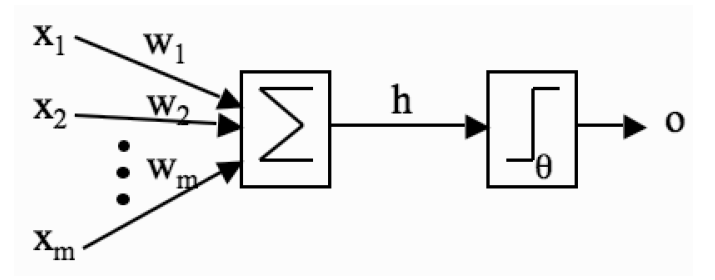
*Ref: Machine Learning: An Algorithmic Perspective 2nd Edition*

Gördüğümüz üzere girdiler ağırlıklarla çarpılıyor, bunların hepsi toplanıyor ve elde edilen sayı "step" fonksiyonuna tabi tutuluyor. Bunun sonucunda 0 veya 1  elde ediyoruz. Tabi bu en sondaki fonksiyon oldukça önemli, genellikle "step" fonksiyonu çok tercih edilmiyor.

Bu tek nörona çoğu yerde "perceptron" da denilmektedir.

### ÇOK KATMANLI "PERCEPTRON" (MULTILAYER PERCEPTRON)

Yukarıda bahsettiğimiz yapınının birden fazla bağlantılı ve ara katmanlara ship olduğu bir mimari düşünün:

![image2.png](image2.png)
*Ref: Pattern Recognition, Duda & Hart*

Yukarıdaki şekilde 3 katmanlı bir mimari görüyoruz. Biraz terminoloji verelim şimdi:
* Girdi Katmanı (Input Layer): Girdilerin alındığı katman
* Gizli Katman (Hidden Layer): Girdi ve Çıktı katmanlarının aralarında kalan diğer  katmanlar. Birden fazla olabilir
* Çıktı Katmanı (Output Layer): Çıktıların verildiği katman

<div class="alert alert-info">
<b>Soru :</b> Peki kurduk diyelim, bu mimari ne işimize yarıyor? <br>
</div>

<div class="alert alert-success">
<b>Cevap :</b> Mimariyi oluşturduktan sonra bunun parametrelerini ayarlamamız lazım. Yani mimarideki ağırlıkların belirlenmesi gerekiyor. Bunu elimizdeki eğitim setini kullanarak nasıl yapabiliriz? <br>
Bu sorunun cevabını "backpropagation" diye vermek mümkün!
</div>

<div class="alert alert-warning">
"Backpropagation" bir yapay sinir ağında katsayıları güncellemek için kullanılan bir metottur. İstenen çıktı ile ağın ürettiği çıktının arasındaki farkın -yani hatanın- kullanılarak ağırlıkların güncellenmesi temelinde çalışmaktadır.
</div>

**"Backpropagation"**
![image3.png](image3.png)
*Ref: DataCamp - Deep Learning Course*

İşin matematiğine çok girmeden *"backpropagation"* ile ilgili bazı kilit noktaları listeleyelim
* Başlangıçta ağırlıklar rastgele değerlere atanır
* Ağırlıkların güncellenmesi için öğrenme hızı (learning rate) parametresi kullanılmaktadır.
* Eğitim sırasında bir validasyon seti kullanılarak hatanın değişiminin incelenmesi ve "overfitting" probleminin önüne geçilmesi gerekmektedir.

"Scikit-Learn" kütüphanesini kullanarak bir örnek yapabiliriz.

In [1]:
# sklearn sınıflandırıcısı çağrılıyor
from sklearn.neural_network import MLPClassifier
# make moons veri seti bu işler için kullanılır genellikle
from sklearn.datasets import make_moons
# Eğitim ve test setini ayırmamız gerekirse
from sklearn.model_selection import train_test_split

In [2]:
# Seaborn dark theme tercihimizdir :)
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
# colormap kullanmak için
from matplotlib.colors import ListedColormap

In [3]:
%matplotlib notebook

In [4]:
# veri sınırlarını çizdirmek için kütüphanemizden ilgili 
import sys
sys.path.append("..")
from datafloyd.plot import plot_decision_region

In [5]:
# Spiral bir veri seti oluşturur
X, y = make_moons(n_samples=1000, noise=0.15, random_state=42)

<IPython.core.display.Javascript object>


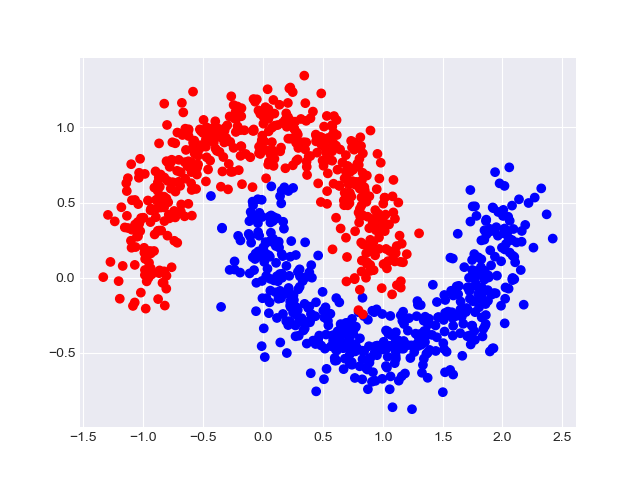

In [6]:
plt.figure()
ax = plt.axes()
cm = plt.cm.RdBu
# mavi ve kırmızı bir colormap olsun
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
# veri setini görelim
ax.scatter(X[:,0],X[:,1],c=y,cmap=cm_bright);

Eğitim ve test olacak şekilde setimizi ayıralım

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4,random_state=0)

**tanh** aktivasyon fonksiyonunu kullanarak eğitimi gerçekleştirelim ve sadece 3'lük bir gizli katmanımız olsun. 

In [8]:
NN = MLPClassifier(hidden_layer_sizes=[3],activation="tanh",solver="lbfgs",random_state=0)
NN.fit(X_train,y_train);

<IPython.core.display.Javascript object>


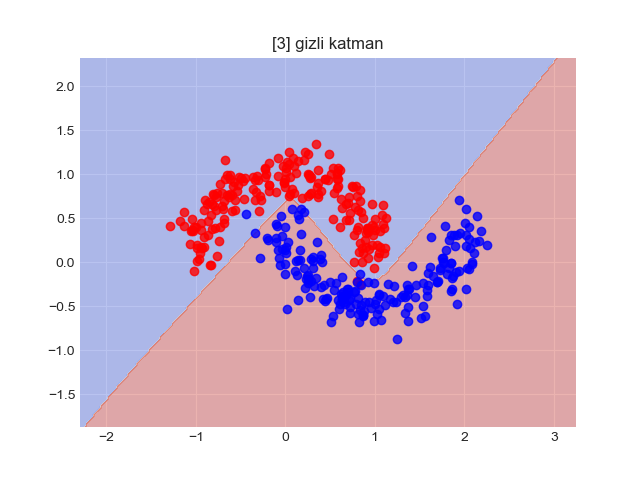

In [9]:
plt.figure()
plot_decision_region(X_test,y_test,NN)
plt.title("[3] gizli katman");

Gizli katman ile biraz oynayalım. Bunu 2 adet 10'luk katman haline getirelim.

In [10]:
NN = MLPClassifier(hidden_layer_sizes=[10,10],activation="tanh",solver="lbfgs",random_state=0)
NN.fit(X_train,y_train);

<IPython.core.display.Javascript object>


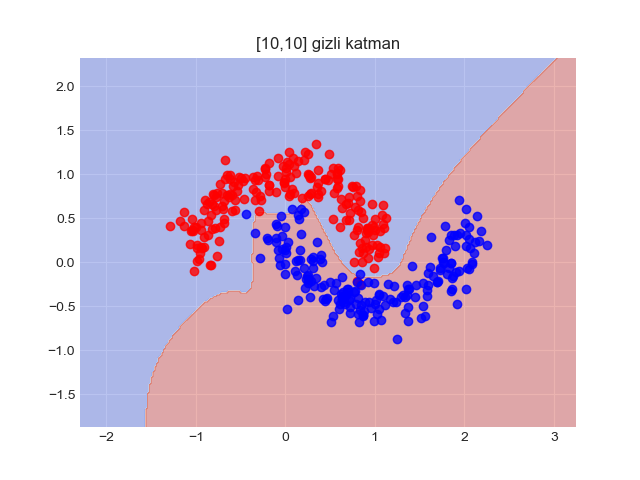

In [11]:
plt.figure()
plot_decision_region(X_test,y_test,NN)
plt.title("[10,10] gizli katman");